<a href="https://colab.research.google.com/github/N-Vasu-Reddy/NYC_yellow_taxi_revenue_maximizing_Project/blob/main/NYC_Taxi_revenue_maximizing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Need to include data about the source of data set

reasons for analysing dataset

meta data about the file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pyarrow.parquet as pq
#Actual code to load a parquet file
# trips_june = pq.read_table('/content/drive/MyDrive/Datasets for miniprojects/yellow_tripdata_2025-06.parquet')
# trips_june = trips_june.to_pandas()

In [3]:
#Loading multiple the datasets and concatinating into a single  dataframe
import os

# Define the base directory
base_dir = '/content/drive/MyDrive/Datasets for Projects/NYC_Maximizing_revenue_Project_datafiles'

# Define the months
months = ['04', '05','06']

# Create a list of file paths
file_paths = [os.path.join(base_dir, f'yellow_tripdata_2025-{month}.parquet') for month in months]

# Initialize an empty list to store dataframes
dfs = []

# Loop through the file paths and read each parquet file
for file_path in file_paths:
    try:
        table = pq.read_table(file_path)
        df = table.to_pandas()
        dfs.append(df)
        print(f"Successfully loaded {file_path}")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Concatenate all dataframes into a single dataframe
trips = pd.concat(dfs, ignore_index=True)

Successfully loaded /content/drive/MyDrive/Datasets for Projects/NYC_Maximizing_revenue_Project_datafiles/yellow_tripdata_2025-04.parquet
Successfully loaded /content/drive/MyDrive/Datasets for Projects/NYC_Maximizing_revenue_Project_datafiles/yellow_tripdata_2025-05.parquet
Successfully loaded /content/drive/MyDrive/Datasets for Projects/NYC_Maximizing_revenue_Project_datafiles/yellow_tripdata_2025-06.parquet


In [4]:
type(trips)

pandas.core.frame.DataFrame

In [5]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-04-01 00:47:06,2025-04-01 01:13:25,1.0,9.50,1.0,N,138,230,1,38.7,11.00,0.5,11.65,6.94,1.0,69.79,2.5,1.75,0.75
1,2,2025-04-01 00:27:35,2025-04-01 00:38:19,2.0,3.77,1.0,N,138,92,1,17.0,6.00,0.5,4.90,0.00,1.0,31.15,0.0,1.75,0.00
2,2,2025-04-01 00:24:07,2025-04-01 00:35:12,1.0,5.41,1.0,N,132,130,1,22.6,1.00,0.5,5.37,0.00,1.0,32.22,0.0,1.75,0.00
3,1,2025-04-01 00:56:30,2025-04-01 01:00:49,2.0,0.60,1.0,N,79,4,1,6.5,4.25,0.5,2.45,0.00,1.0,14.70,2.5,0.00,0.75
4,2,2025-04-01 00:00:17,2025-04-01 00:16:19,1.0,0.43,1.0,N,161,229,2,4.4,1.00,0.5,0.00,0.00,1.0,10.15,2.5,0.00,0.75


#Exploratory Data Analysis(EDA)

In [6]:
trips.shape

(12885358, 20)

In [7]:
trips.dtypes

,0
VendorID,int32
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
store_and_fwd_flag,object
PULocationID,int32
DOLocationID,int32
payment_type,int64


In [8]:
# Calculating duration from the pickup and dropoff datetime in minutes
trips['duration'] = trips['tpep_dropoff_datetime']-trips['tpep_pickup_datetime']
# converting into minutes
trips['duration'] = trips['duration'].dt.total_seconds()/60

In [9]:
trips.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,duration
0,1,2025-04-01 00:47:06,2025-04-01 01:13:25,1.0,9.50,1.0,N,138,230,1,...,11.00,0.5,11.65,6.94,1.0,69.79,2.5,1.75,0.75,26.316667
1,2,2025-04-01 00:27:35,2025-04-01 00:38:19,2.0,3.77,1.0,N,138,92,1,...,6.00,0.5,4.90,0.00,1.0,31.15,0.0,1.75,0.00,10.733333
2,2,2025-04-01 00:24:07,2025-04-01 00:35:12,1.0,5.41,1.0,N,132,130,1,...,1.00,0.5,5.37,0.00,1.0,32.22,0.0,1.75,0.00,11.083333
3,1,2025-04-01 00:56:30,2025-04-01 01:00:49,2.0,0.60,1.0,N,79,4,1,...,4.25,0.5,2.45,0.00,1.0,14.70,2.5,0.00,0.75,4.316667
4,2,2025-04-01 00:00:17,2025-04-01 00:16:19,1.0,0.43,1.0,N,161,229,2,...,1.00,0.5,0.00,0.00,1.0,10.15,2.5,0.00,0.75,16.033333


## Data Cleaning

In [10]:
#removing unwanted columns
trips.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','RatecodeID',
            'store_and_fwd_flag','PULocationID','DOLocationID','total_amount',
            'extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge',
            'congestion_surcharge','Airport_fee','cbd_congestion_fee'],axis =1, inplace = True)

**Reasons for droping the columns**



| Column Name           | Reason for Dropping                                         |
|-----------------------|-------------------------------------------------------------|
| VendorID              | Doesn't influence earnings—just identifies the taxi provider. |
| tpep_pickup_datetime  | Replaced by duration; not needed separately for analysis.   |
| tpep_dropoff_datetime | Same as above—used only to compute duration.                |
| RatecodeID            | Usually defaults or missing—offers little strategic insight. |
| store_and_fwd_flag    | Indicates transmission delays—irrelevant to revenue.          |
| PULocationID          | Dropped due to low granularity or limited revenue correlation. |
| DOLocationID          | Similar to PULocationID; not central to income patterns.    |
| extra                 | Already included in total_amount—redundant for analysis.    |
| mta_tax               | Fixed tax with no variability—adds no optimization value.   |
| tip_amount            | Excludes cash tips and skews data—doesn’t reflect true earnings. |
| tolls_amount          | Typically included in total_amount—no added insight.        |
| improvement_surcharge | Flat fee on all trips—doesn’t support targeted analysis.    |
| congestion_surcharge  | Static inclusion in total_amount—no optimization leverage.  |
| Airport_fee           | Applies only to specific airport pickups—not broadly useful. |
| cbd_congestion_fee    | Zone-specific fee with narrow scope—limited in general modeling. |

In [11]:
trips.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,9.50,1,38.7,26.316667
1,2.0,3.77,1,17.0,10.733333
2,1.0,5.41,1,22.6,11.083333
3,2.0,0.60,1,6.5,4.316667
4,1.0,0.43,2,4.4,16.033333


In [12]:
trips.isnull().sum()

,0
passenger_count,3154852
trip_distance,0
payment_type,0
fare_amount,0
duration,0


In [13]:
trips.shape

(12885358, 5)

In [14]:
5418601/len(trips) *100

42.05239000732459

Here the percentage of missing data > 5%.

In such cases we cannot simply drop the data. Instead we can perform ***imputation***.

Here we are using **Median** for imputing the 'passenger_count' column


Reason: The dataset is big in terms of size and mean can be easily effected by outliers. The median, on the other hand, represents the middle value in the dataset and is not affected by extreme values, making it a more robust choice for imputation in this case.

In [15]:
# Fill null values in 'passenger_count' with the median
median_passenger_count = trips['passenger_count'].median()
trips['passenger_count'].fillna(median_passenger_count, inplace=True)

# Check if there are any remaining null values in 'passenger_count'
trips['passenger_count'].isnull().sum()

np.int64(0)

In [16]:
# Convert 'passenger_count' to integer type after handling null values
trips['passenger_count'] = trips['passenger_count'].astype('int64')

**NOTE**: typecasting 'passenger_count' before handling NULL values leads to the error '**IntCastingNaNError**'



In [17]:
#Check for duplicated rows
trips[trips.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
118,1,2.33,1,14.20,12.050000
3095,1,0.46,1,5.10,2.333333
3452,1,0.60,1,7.20,6.933333
3605,1,0.97,1,7.20,4.600000
4246,1,1.00,1,7.90,7.466667
...,...,...,...,...,...
12885256,1,6.93,0,-4.75,18.283333
12885276,1,1.46,0,-4.75,8.183333
12885284,1,0.77,0,8.30,5.000000
12885340,1,1.77,0,-4.75,8.683333


In [18]:
5275405 /len(trips) *100

40.941082118168545

Around 41% of row in the dataset are duplicates. Duplicates do not contribute anything in the analysis. So, we drop the duplicates.

In [19]:
#Deleting duplicated rows
trips.drop_duplicates(inplace = True)

In [20]:
trips['passenger_count'].value_counts(normalize = True)

,proportion
passenger_count,
1,8.040524e-01
2,1.183572e-01
3,3.541244e-02
4,2.538189e-02
0,6.801487e-03
5,6.467845e-03
6,3.521835e-03
8,3.285171e-06
9,1.051255e-06


In [21]:
trips['payment_type'].value_counts(normalize = True)

,proportion
payment_type,
1,4.533203e-01
0,3.943902e-01
2,1.090875e-01
4,3.442807e-02
3,8.773642e-03
5,2.628137e-07


passenger_count = 0 doesn't make any sense

Accoording to documentation of 'Yellow trips data dictionary', payment_type = 0 refers to Flex Fare trip(a specialized payment arrangement—not the typical metered fare). We should not include it in analysis.

In [22]:
#filtering dataset
trips = trips[(trips['payment_type']>0) & (trips['payment_type']<3)]
trips = trips[(trips['passenger_count']>0) & (trips['passenger_count']<6)]

In [23]:
trips['payment_type'] = trips['payment_type'].replace({1: 'Card', 2: 'Cash'})
trips.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,9.50,Card,38.7,26.316667
1,2,3.77,Card,17.0,10.733333
2,1,5.41,Card,22.6,11.083333
3,2,0.60,Card,6.5,4.316667
4,1,0.43,Cash,4.4,16.033333


In [24]:
trips.describe()

,passenger_count,trip_distance,fare_amount,duration
count,4.203493e+06,4.203493e+06,4.203493e+06,4.203493e+06
mean,1.496191e+00,6.600476e+00,2.905837e+01,2.547367e+01
std,8.747172e-01,1.381831e+02,1.605912e+02,4.357299e+01
min,1.000000e+00,0.000000e+00,-1.047400e+03,-5.168333e+01
25%,1.000000e+00,1.710000e+00,1.420000e+01,1.260000e+01
50%,1.000000e+00,3.300000e+00,2.190000e+01,2.016667e+01
75%,2.000000e+00,8.000000e+00,3.750000e+01,3.085000e+01
max,5.000000e+00,5.048679e+04,3.254780e+05,6.656433e+03


Upon reviewing the statistics, it's clear that the minimum values for trip distance, fare amount, and duration are negative, which is unrealistic and invalid for further analysis. Consequently, we will eliminate these negative values from the dataset.


Furthermore, observing the maximum and 50th percentile values, it's possible that the data contains significant outliers, particularly high values. These outliers need to be addressed and removed to ensure the integrity of the analysis.

In [25]:
#filtering the records for only positive values
trips= trips[trips['trip_distance']>0]
trips= trips[trips['fare_amount']>0]
trips= trips[trips['duration']>0]

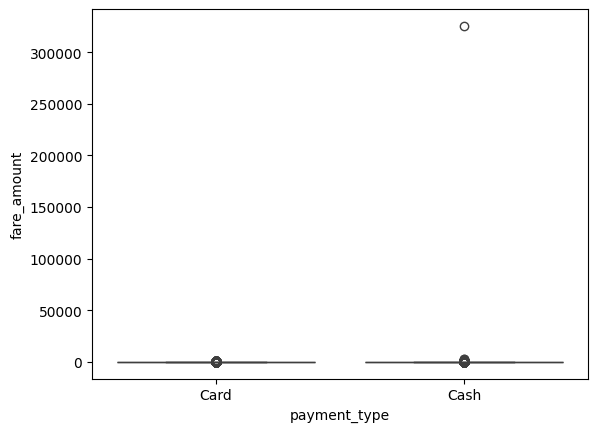

In [26]:
#check for outliers
sns.boxplot(data=trips, y='fare_amount', x= 'payment_type')
plt.show()

In [27]:
# Handle outliers in fare_amount by removing values above a certain threshold
# Based on the boxplot and describe(), a threshold of 150 seems reasonable to remove extreme outliers in fare_amount and a threshold of 50 for trip_distance.
trips = trips[(trips['fare_amount'] < 150) & (trips['trip_distance'] < 50)]
# Verify the changes by displaying the descriptive statistics again
display(trips.describe())

,passenger_count,trip_distance,fare_amount,duration
count,4.070809e+06,4.070809e+06,4.070809e+06,4.070809e+06
mean,1.495096e+00,5.635621e+00,2.909200e+01,2.576631e+01
std,8.743608e-01,5.528327e+00,2.076910e+01,4.276498e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.760000e+00,1.420000e+01,1.300000e+01
50%,1.000000e+00,3.330000e+00,2.190000e+01,2.043333e+01
75%,2.000000e+00,8.030000e+00,3.800000e+01,3.101667e+01
max,5.000000e+00,4.898000e+01,1.497500e+02,6.499250e+03


## Data Visualization

### Distribution of Fare Amount and Trip Distance

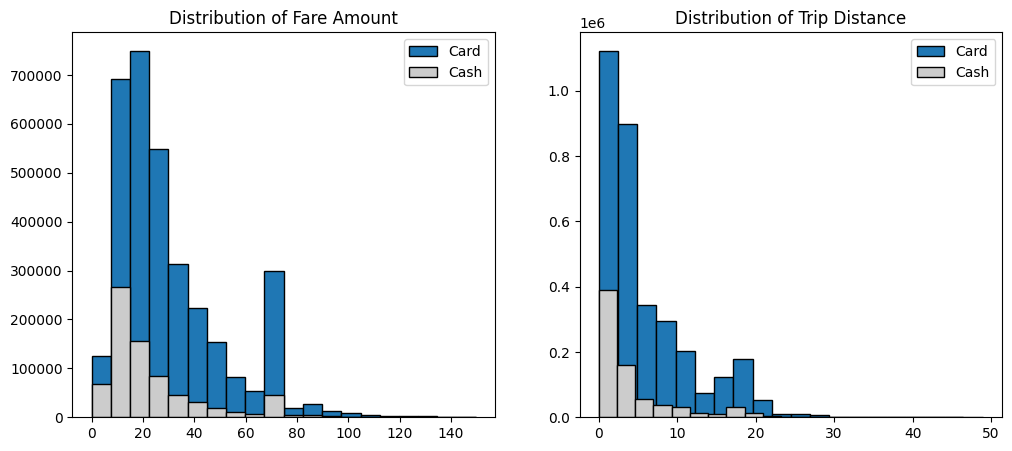

In [28]:
import matplotlib.ticker as mticker
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(trips[trips['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#1f77b4', label = 'Card')
plt.hist(trips[trips['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#cccccc',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(trips[trips['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#1f77b4',label = 'Card')
plt.hist(trips[trips['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#cccccc',label = 'Cash')
plt.legend()
plt.show()

In [29]:
# calculating the mean and standard deviation group by on payment type
trips.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

fare_amount            trip_distance          
                    mean        std          mean       std
payment_type                                               
Card           30.285274  20.836615      5.923767  5.585004
Cash           23.800537  19.610843      4.357861  5.076265

Now, in order to examine the passenger's preference regarding their choice of payment method, we will assess the proportion of the two payment types. To provide a visual representation, we have opted to utilize a pie chart. This graphical depiction will offer a clear and intuitive understanding of the distribution between the two payment methods chosen by passengers.

### Preference of payment

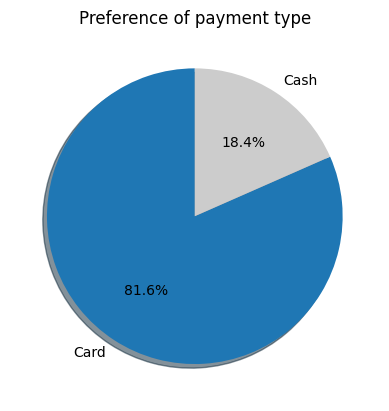

In [30]:
plt.title('Preference of payment type')
plt.pie(trips['payment_type'].value_counts(normalize= True), labels= trips['payment_type'].value_counts().index,
       startangle= 90, shadow= True, autopct= '%1.1f%%', colors= ['#1f77b4','#cccccc'] )
plt.show()

### Distribution of passenger_count over payment_type

In [31]:
trips_grouped = trips.groupby(['payment_type','passenger_count'])['passenger_count'].count()
trips_grouped

payment_type  passenger_count
Card          1                  2272945
              2                   669819
              3                   203024
              4                   134985
              5                    40955
Cash          1                   514086
              2                   149482
              3                    42696
              4                    35343
              5                     7474
Name: passenger_count, dtype: int64

In [32]:
passenger_count = trips.groupby(['payment_type','passenger_count'])['passenger_count'].count()
passenger_count = passenger_count.reset_index(name='count')

In [33]:
passenger_count

,payment_type,passenger_count,count
0,Card,1,2272945
1,Card,2,669819
2,Card,3,203024
3,Card,4,134985
4,Card,5,40955
5,Cash,1,514086
6,Cash,2,149482
7,Cash,3,42696
8,Cash,4,35343
9,Cash,5,7474


In [34]:
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,2272945,55.835216
1,Card,2,669819,16.454199
2,Card,3,203024,4.987313
3,Card,4,134985,3.315926
4,Card,5,40955,1.006065
5,Cash,1,514086,12.628595
6,Cash,2,149482,3.672047
7,Cash,3,42696,1.048833
8,Cash,4,35343,0.868206
9,Cash,5,7474,0.183600


In [35]:
df= pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])
df['payment_type']= ['Card','Cash']
#This will create an empty dataframe df

#Filling the df with percentages in percentage_count
df.iloc[0,1:] = passenger_count.iloc[:5,-1]  #iloc[row_index, column_index]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]  #iloc[row_index, column_index]
df

,payment_type,1,2,3,4,5
0,Card,55.835216,16.454199,4.987313,3.315926,1.006065
1,Cash,12.628595,3.672047,1.048833,0.868206,0.1836


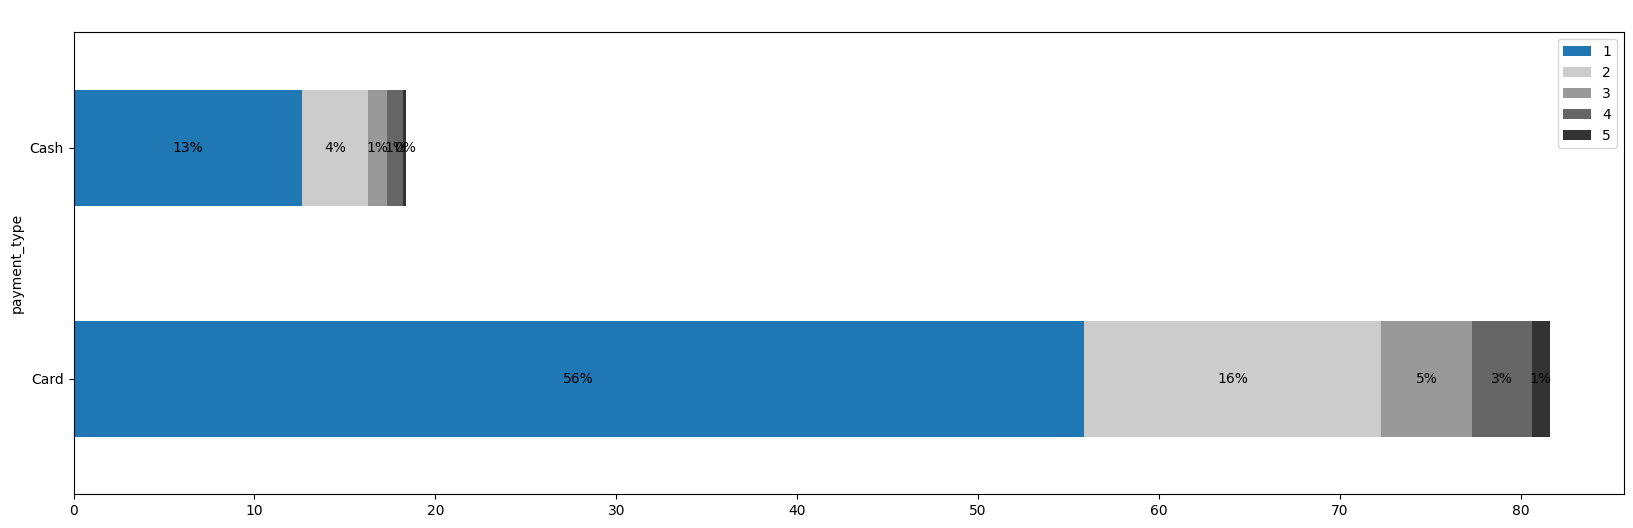

In [36]:
fig, ax= plt.subplots(figsize=(20,6))
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax,
        color=['#1f77b4', '#cccccc', '#999999', '#666666', '#333333'])

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

# Hypothesis Testing

>**Null hypothesis**: There is no difference in average fare between customers who use Credit cards and customers who use cash.

>**Alternate hypothesis**: There is a significant difference in average fare between customers who use Credit cards and customers who use cash.

In order to select the most suitable test for our scenario, initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

**Quantile-quantile (QQ)** plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

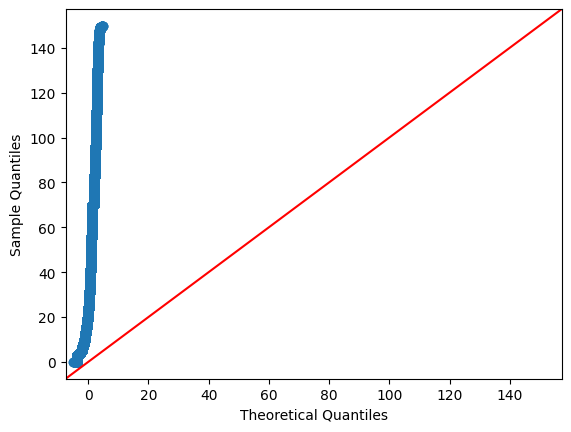

In [37]:
sm.qqplot(trips['fare_amount'], line = '45')
plt.show()

Here we can identify the data is not aligned with the 45-degree line.

If the points roughly follow the 45-degree line, the data is normally distributed.But the points deviate significantly. So, the data is not normally distributed. So, Z distribution will not be good for this. That's why we will use T test.

T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.


In [38]:
card_sample = trips[trips['payment_type']=='Card']['fare_amount']
cash_sample = trips[trips['payment_type']=='Cash']['fare_amount']

In [39]:
t_stat,p_value = st.ttest_ind(a=card_sample, b=cash_sample,equal_var=False)
print('T-Statistic = ',t_stat,'\nP-Value = ',p_value)

T-Statistic =  255.51187948572561 
P-Value =  0.0


Here the P-value < significance value(0.5).

Hence we **Reject the Null Hypothesis**

>There is a significant difference in average fare between customers who use Credit cards and customers who use cash.

In [40]:
# Perform regression analysis
# Define the dependent variable (y) and independent variable (x)
y = trips['fare_amount']
x = trips['duration']

# Add a constant to the independent variable for the intercept
x = sm.add_constant(x)

# Create and fit the OLS model
model = sm.OLS(y, x).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                 4.327e+05
Date:                Wed, 30 Jul 2025   Prob (F-statistic):               0.00
Time:                        07:27:46   Log-Likelihood:            -1.7919e+07
No. Observations:             4070809   AIC:                         3.584e+07
Df Residuals:                 4070807   BIC:                         3.584e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2131      0.011   2206.653      0.0

## Key Findings from the Analysis:

Here's a summary of what we found from the data analysis:

*   **Data Loaded:** We successfully loaded and combined taxi trip data for April, May, and June 2025.
*   **Data Cleaning:** We cleaned the data by:
    *   Removing columns that were not essential for analyzing fare amounts and trip characteristics.
    *   Handling missing values in the `passenger_count` column by imputing with the median.
    *   Removing duplicate rows.
    *   Filtering out unrealistic values like negative trip distance, fare amount, or duration.
    *   Addressing outliers in `fare_amount` and `trip_distance`.
*   **Payment Type Preference:** A significant majority of passengers (around 80%) prefer using Credit Cards for payment compared to Cash (around 20%).
*   **Fare and Distance Distribution:**
    *   Both fare amount and trip distance distributions are skewed, with many trips having lower fares and shorter distances.
    *   Trips paid by Card tend to have slightly higher average fare amounts and longer average trip distances compared to trips paid by Cash.
*   **Passenger Count Distribution:** Most trips have 1 or 2 passengers, regardless of the payment type.
*   **Hypothesis Testing:** Based on the t-test, there is a statistically significant difference in the average fare amount between customers who use Credit Cards and those who use Cash.
*   **Regression Analysis (Fare Amount vs. Duration):**
     There is a statistically significant positive relationship between trip duration and fare amount. On average, the fare increases by about $0.15 for every additional minute of the trip.

Therefore, the key business insight is that encouraging customers to pay with credit cards might generate more revenue for taxi cab drivers.